## 5) Evaluating different models

In the next section, different baseline models are created for the prediction. The best one will then be further tuned to get the best performance.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import pickle

plt.style.use("seaborn-white")
plt.rcParams["font.size"] = 14
colors = sns.color_palette("Paired")

In [30]:
X_train_res = pd.read_csv(f"data/X_train_res.csv", index_col = 0)
y_train_res = np.ravel(pd.read_csv(f"data/y_train_res.csv", index_col = 0))
X_test = pd.read_csv(f"data/X_test.csv", index_col = 0)
y_test = np.ravel(pd.read_csv(f"data/y_test.csv", index_col = 0))

### Logistic regression

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       405
           1       0.72      0.73      0.72       405

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.72       810
weighted avg       0.72      0.72      0.72       810

Cross-validation scores: [0.59876543 0.63580247 0.7037037  0.74691358 0.7962963 ]


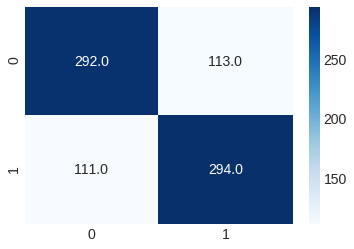

In [31]:
scores = []

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_res, y_train_res)
pred_logreg = logreg.predict(X_train_res)

cross_val_logreg = cross_val_score(
        logreg,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_logreg.mean())

print(classification_report(y_train_res, pred_logreg))
print(f"Cross-validation scores: {cross_val_logreg}")

cf = confusion_matrix(y_train_res, pred_logreg)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### KNN

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       405
           1       0.84      0.71      0.77       405

    accuracy                           0.79       810
   macro avg       0.80      0.79      0.79       810
weighted avg       0.80      0.79      0.79       810

Cross-validation scores: [0.59876543 0.62962963 0.64814815 0.7654321  0.72839506]


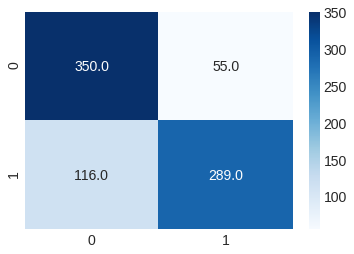

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res, y_train_res)
pred_knn = knn.predict(X_train_res)

cross_val_knn = cross_val_score(
        knn,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_knn.mean())

print(classification_report(y_train_res, pred_knn))
print(f"Cross-validation scores: {cross_val_knn}")

cf = confusion_matrix(y_train_res, pred_knn)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Naive Bayes

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       405
           1       0.69      0.62      0.65       405

    accuracy                           0.67       810
   macro avg       0.67      0.67      0.67       810
weighted avg       0.67      0.67      0.67       810

Cross-validation scores: [0.55555556 0.61111111 0.62962963 0.69135802 0.62962963]


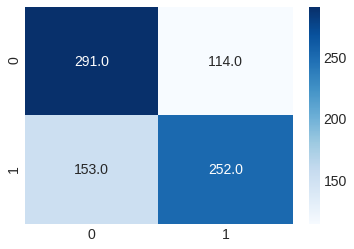

In [33]:
nb = BernoulliNB()

nb.fit(X_train_res, y_train_res)
pred_nb = nb.predict(X_train_res)

cross_val_nb = cross_val_score(
        nb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_nb.mean())
print(classification_report(y_train_res, pred_nb))
print(f"Cross-validation scores: {cross_val_nb}")

cf = confusion_matrix(y_train_res, pred_nb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### SVM: linear and rbf

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       405
           1       0.70      0.75      0.73       405

    accuracy                           0.72       810
   macro avg       0.72      0.72      0.72       810
weighted avg       0.72      0.72      0.72       810

Cross-validation scores: [0.58024691 0.59876543 0.67901235 0.7654321  0.82098765]


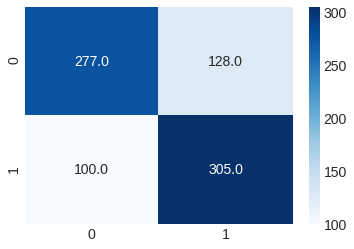

In [34]:
lin_svm = LinearSVC(max_iter = 5000)

lin_svm.fit(X_train_res, y_train_res)
pred_lin_svm = lin_svm.predict(X_train_res)

cross_val_lin_svm = cross_val_score(
        lin_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_lin_svm.mean())
print(classification_report(y_train_res, pred_lin_svm))
print(f"Cross-validation scores: {cross_val_lin_svm}")

cf = confusion_matrix(y_train_res, pred_lin_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       405
           1       0.78      0.70      0.74       405

    accuracy                           0.75       810
   macro avg       0.76      0.75      0.75       810
weighted avg       0.76      0.75      0.75       810

Cross-validation scores: [0.58641975 0.65432099 0.68518519 0.77160494 0.7654321 ]


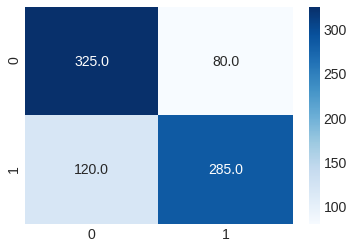

In [35]:
rbf_svm = SVC(kernel='rbf', gamma = "scale")

rbf_svm.fit(X_train_res, y_train_res)
pred_rbf_svm = rbf_svm.predict(X_train_res)

cross_val_rbf_svm = cross_val_score(
        rbf_svm,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_rbf_svm.mean())
print(classification_report(y_train_res, pred_rbf_svm))
print(f"Cross-validation scores: {cross_val_rbf_svm}")

cf = confusion_matrix(y_train_res, pred_rbf_svm)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       405

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810

Mean of cross-validation scores: [0.67901235 0.66666667 0.69135802 0.75925926 0.79012346]


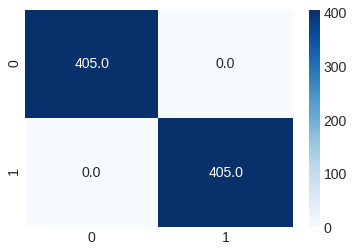

In [36]:
rfc = RandomForestClassifier()

rfc.fit(X_train_res, y_train_res)
pred_rfc = rfc.predict(X_train_res)

cross_val_rfc = cross_val_score(
        rfc,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_rfc.mean())
print(classification_report(y_train_res, pred_rfc))
print(f"Mean of cross-validation scores: {cross_val_rfc}")

cf = confusion_matrix(y_train_res, pred_rfc)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### XGBoost

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       405
           1       0.99      0.98      0.98       405

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810

Mean of cross-validation scores: [0.62345679 0.65432099 0.72839506 0.77160494 0.72839506]


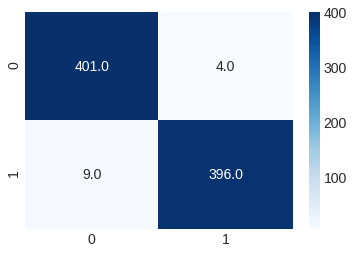

In [37]:
xgb = XGBClassifier()

xgb.fit(X_train_res, y_train_res)
pred_xgb = xgb.predict(X_train_res)

cross_val_xgb = cross_val_score(
        xgb,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_xgb.mean())
print(classification_report(y_train_res, pred_xgb))
print(f"Mean of cross-validation scores: {cross_val_xgb}")

cf = confusion_matrix(y_train_res, pred_xgb)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Cat Boost

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       405
           1       0.90      0.83      0.86       405

    accuracy                           0.87       810
   macro avg       0.87      0.87      0.87       810
weighted avg       0.87      0.87      0.87       810

Mean of cross-validation scores: [0.64814815 0.63580247 0.67901235 0.7345679  0.79012346]


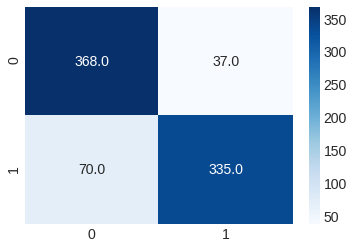

In [38]:
cat = CatBoostClassifier(verbose = False)

cat.fit(X_train_res, y_train_res)
pred_cat = cat.predict(X_train_res)

cross_val_cat = cross_val_score(
        cat,
        X_train_res,
        y_train_res,
        cv=5,
        scoring = "accuracy"
    )

scores.append(cross_val_cat.mean())
print(classification_report(y_train_res, pred_cat))
print(f"Mean of cross-validation scores: {cross_val_cat}")

cf = confusion_matrix(y_train_res, pred_cat)
sns.heatmap(cf, annot=True, fmt='.1f', cmap = "Blues");

### Comparison of baseline models

The highest score is: 0.717283950617284 from the model: rfc.


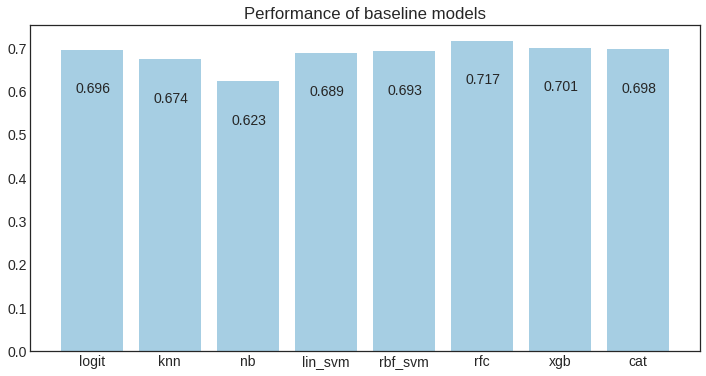

In [39]:
models = ["logit", "knn", "nb", "lin_svm", "rbf_svm", "rfc", "xgb", "cat"]

fig, ax = plt.subplots(figsize = (12, 6))
plt.bar(models, scores, color = colors[0]);
for index, data in enumerate(scores):
    plt.text(x = index - 0.21, y = data - 0.1, s = f"{round(data, 3)}", fontdict=dict(fontsize=14))
plt.title("Performance of baseline models");
print(
    f"The highest score is: {np.max(scores)} from the model: {models[scores.index(np.max(scores))]}."
)

Based on this quick evaluation of untuned baseline models, we will carry on with the Random Forest Model to find the best parameters and achieve even better predictions.

In [40]:
filename = 'models/rfc_model.sav'
pickle.dump(rfc, open(filename, 'wb'))